# BoomBikes Bike Sharing Assignment

### Problem Statement
A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 

In [1]:
# Importing all required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels
import statsmodels.api as sm
import sklearn
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

In [2]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [3]:
#Importing dataset

boomDays=pd.read_csv('day.csv')
boomDays.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### Understanding the data

In [4]:
boomDays.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 88.5+ KB


In [5]:
boomDays.shape

(730, 16)

In [6]:
boomDays.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


####  There are no null values/ missing values in the data.  But we need to convert variables to their relevant type.

### Encoding the categorical variables 

In [7]:
boomDays['season']=boomDays['season'].map({
        1:'Spring', 2:'Summer', 3:'Fall', 4:'Winter'
    })
boomDays.season.value_counts()

Fall      188
Summer    184
Spring    180
Winter    178
Name: season, dtype: int64

In [8]:
boomDays.mnth=boomDays.mnth.map({
        1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',
        7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'
    })
boomDays.mnth.value_counts()

Jul    62
Oct    62
Dec    62
Aug    62
Mar    62
May    62
Jan    62
Jun    60
Apr    60
Nov    60
Sep    60
Feb    56
Name: mnth, dtype: int64

In [9]:
boomDays.weekday=boomDays.weekday.map({
        0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat'
    })
boomDays.weekday.value_counts()

Tue    105
Mon    105
Sun    104
Wed    104
Sat    104
Thu    104
Fri    104
Name: weekday, dtype: int64

In [10]:
boomDays.weathersit=boomDays.weathersit.map({1:'Clear',2:'Mist',3:'Light Snow',4:'Heavy Rain'})
boomDays.weathersit.value_counts()

Clear         463
Mist          246
Light Snow     21
Name: weathersit, dtype: int64

In [11]:
boomDays.dteday=pd.to_datetime(boomDays.dteday)
boomDays.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     730 non-null    int64         
 1   dteday      730 non-null    datetime64[ns]
 2   season      730 non-null    object        
 3   yr          730 non-null    int64         
 4   mnth        730 non-null    object        
 5   holiday     730 non-null    int64         
 6   weekday     730 non-null    object        
 7   workingday  730 non-null    int64         
 8   weathersit  730 non-null    object        
 9   temp        730 non-null    float64       
 10  atemp       730 non-null    float64       
 11  hum         730 non-null    float64       
 12  windspeed   730 non-null    float64       
 13  casual      730 non-null    int64         
 14  registered  730 non-null    int64         
 15  cnt         730 non-null    int64         
dtypes: datetime64[ns](1), floa

'yr', 'holiday' and 'workingday' are in int64 format. we need to convert them to categorical/object type for better analysis

In [12]:
boomDays.yr=boomDays.yr.astype(object)

In [13]:
boomDays.holiday=boomDays.holiday.astype(object)

In [14]:
boomDays.workingday=boomDays.workingday.astype(object)

In [15]:
# We can drop 'instant' column as it is as good as index.
boomDays.drop(['instant','dteday'],axis=1,inplace=True)

In [16]:
boomDays.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    object 
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    object 
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    object 
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  casual      730 non-null    int64  
 12  registered  730 non-null    int64  
 13  cnt         730 non-null    int64  
dtypes: float64(4), int64(3), object(7)
memory usage: 59.9+ KB


In [17]:
boomDays.describe()

,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


###### List down numeric and categorical columns

In [18]:
b_numeric=boomDays.describe().columns
b_numeric

Index(['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt'], dtype='object')

In [19]:
b_category=boomDays.columns.drop(b_numeric)
b_category

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit'],
      dtype='object')

###### Check for outliers in the categorical columns

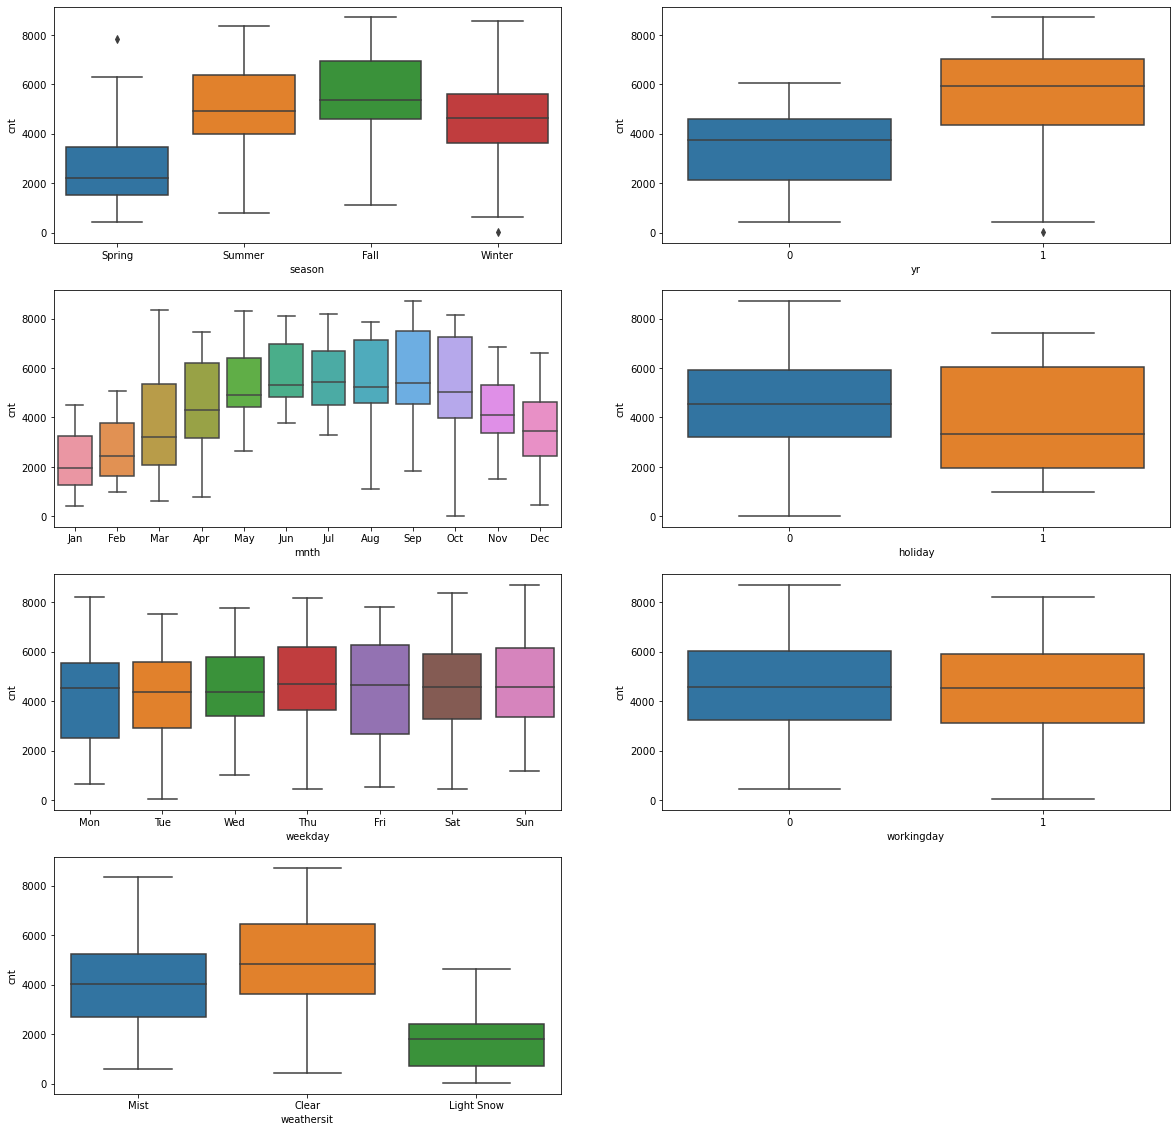

In [20]:
plt.figure(figsize=(20,20))
for i in range(len(b_category)):
    plt.subplot(4,2,i+1)
    sns.boxplot(x=b_category[i],y='cnt',data=boomDays)


As we can see from above plots there are not much outliers in the data.
One outlier is present in spring season with cnt of approx. 8000 and one more outlieris in sinter season with almost 0 cnt.
One outlier is shown in year 2019 with cnt 0.
All the above outliers are possible cases in practical life. Hence we shall not remove/impute these outliers.

###### Check for trends in categorical columns using barplots.

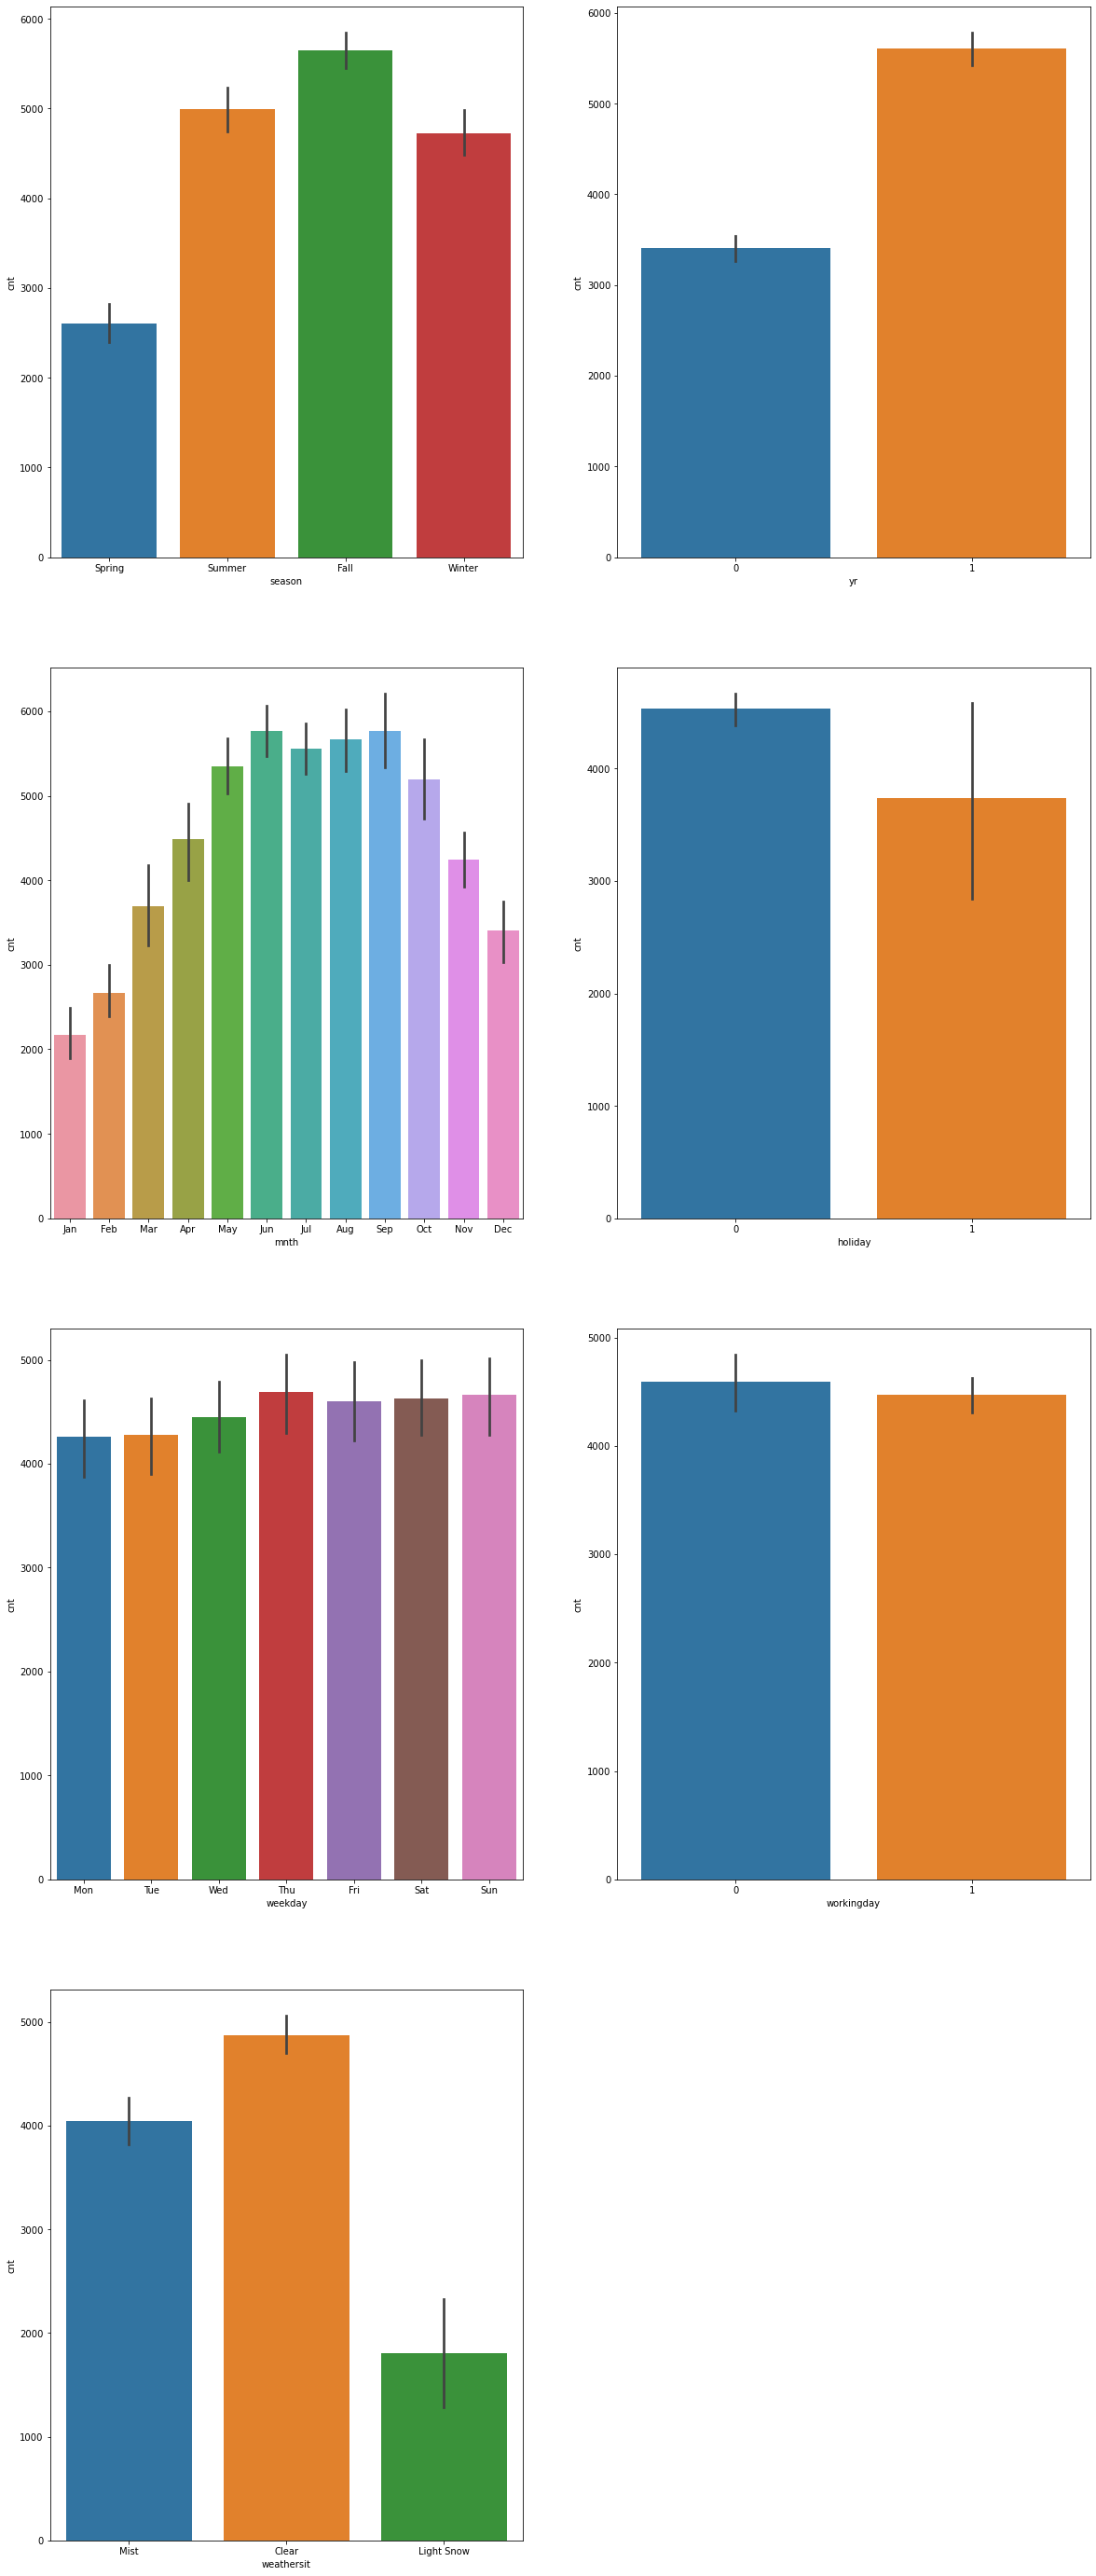

In [21]:
plt.figure(figsize=(20,50))
for i in range(len(b_category)):
    plt.subplot(4,2,i+1)
    sns.barplot(x=b_category[i],y='cnt',data=boomDays)


1) Average bikes rented in  Fall season is most while Spring season had least no. of bikes rented.

2) Average no.of bikes rented had huge rise in 2019 as compared to 2018. 

3) Light Snow weather reduces the number of bikes rented. People tend to rent more bikes during Clear Weather

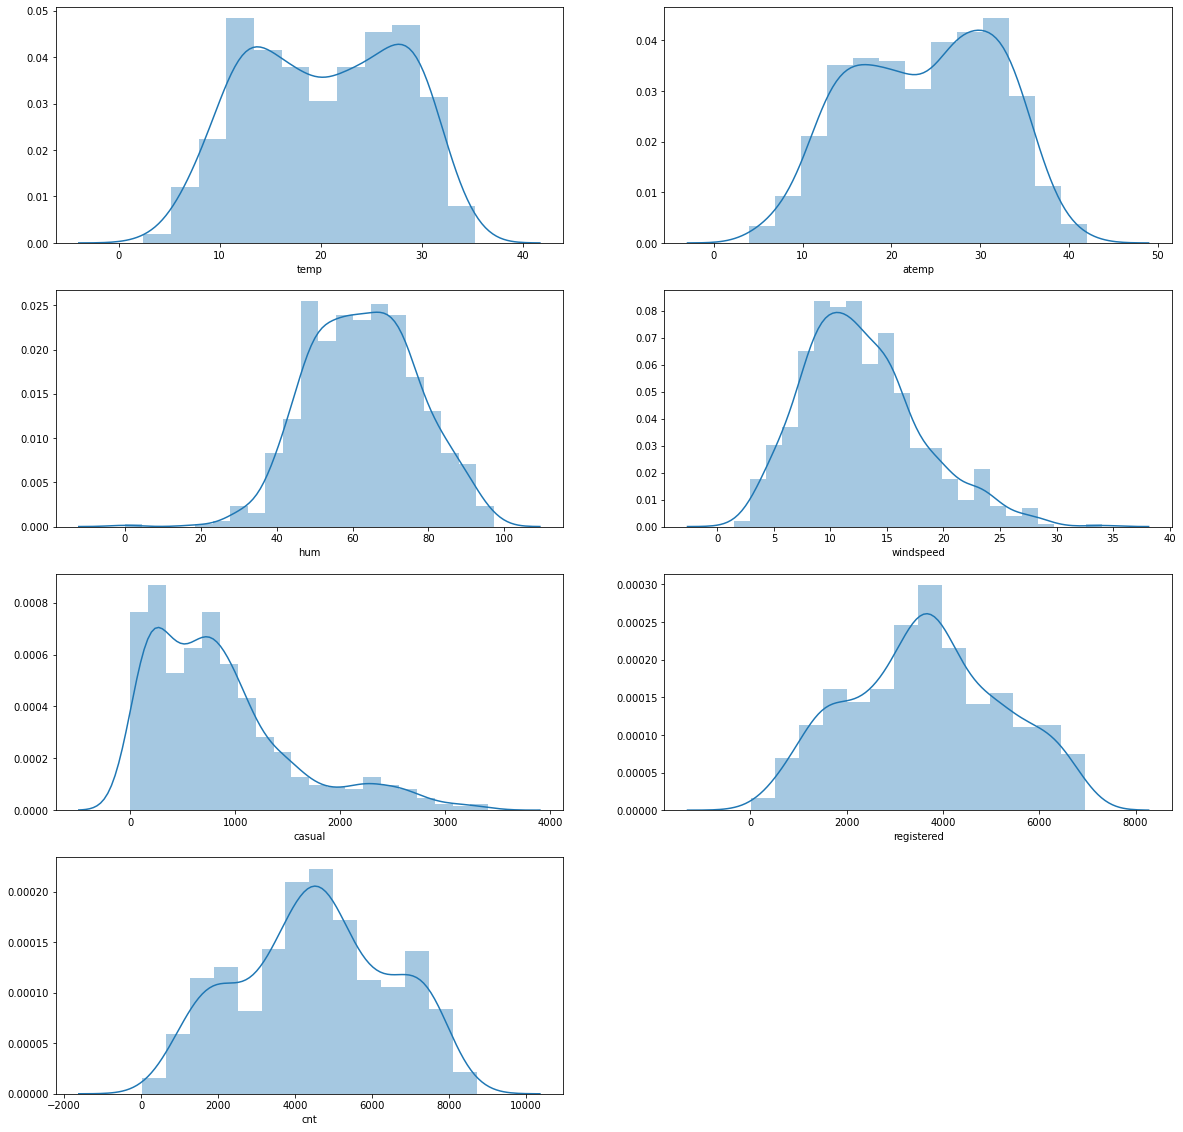

In [22]:
plt.figure(figsize=(20,20))
for i in range(len(b_numeric)):
    plt.subplot(4,2,i+1)
    sns.distplot(boomDays[b_numeric[i]])


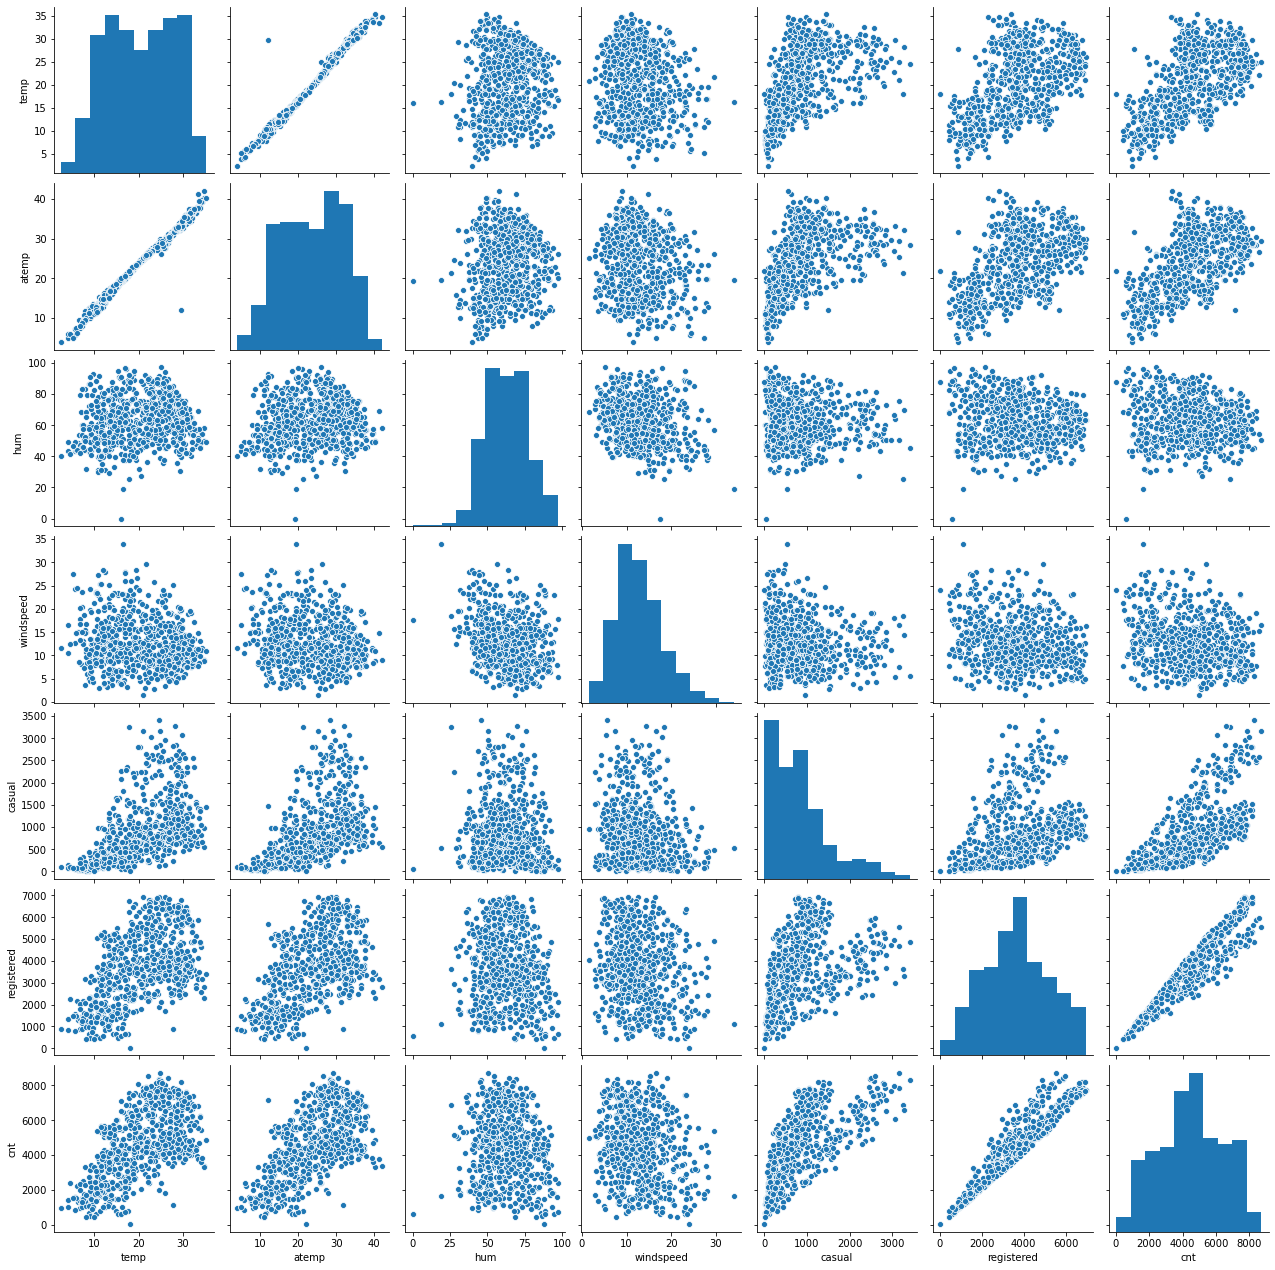

In [23]:
sns.pairplot(boomDays[b_numeric])
plt.show()

1) Temp vs Cnt seems to have positive correlation with high rentals between temp 20-30 degrees

2) Humidity and windspeed have evenly distirbuted Cnt for rentals.

## Correlation Matrix

In [24]:
cor=boomDays[b_numeric].corr().abs()
cor

,temp,atemp,hum,windspeed,casual,registered,cnt
temp,1.000000,0.991696,0.128565,0.158186,0.542731,0.539436,0.627044
atemp,0.991696,1.000000,0.141512,0.183876,0.543362,0.543678,0.630685
hum,0.128565,0.141512,1.000000,0.248506,0.075211,0.089212,0.098543
windspeed,0.158186,0.183876,0.248506,1.000000,0.167995,0.217914,0.235132
casual,0.542731,0.543362,0.075211,0.167995,1.000000,0.394137,0.672123
registered,0.539436,0.543678,0.089212,0.217914,0.394137,1.000000,0.945411
cnt,0.627044,0.630685,0.098543,0.235132,0.672123,0.945411,1.000000


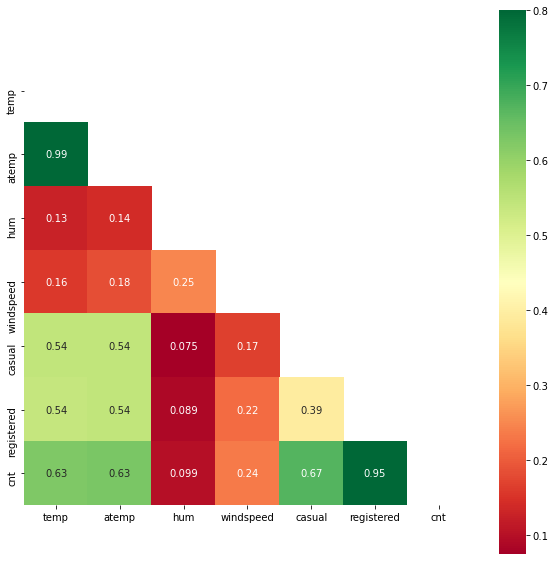

In [25]:
mask = np.zeros_like(cor)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(10, 10))
ax = sns.heatmap(cor,cmap='RdYlGn', mask=mask, vmax=.8, square=True,annot=True);

1) Temp and Atemp have high correlation of 0.99. If Both variables included in model it will be clear case of multicolinearity.

2) Most of variables have descent low value of correlation, except temp and atemp.

## Data Preperation

In [26]:
boomDays.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,Spring,0,Jan,0,Mon,1,Mist,14.110847,18.18125,80.5833,10.749882,331,654,985
1,Spring,0,Jan,0,Tue,1,Mist,14.902598,17.68695,69.6087,16.652113,131,670,801
2,Spring,0,Jan,0,Wed,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,Spring,0,Jan,0,Thu,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,Spring,0,Jan,0,Fri,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### Since casual, registered and cnt all three are count of number of users.
Drop casual and registered column keeping only 1 target column i.e. "cnt"

In [27]:
boomDays.drop(['casual','registered'],axis=1,inplace=True)

In [28]:
boomDays.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,Jan,0,Mon,1,Mist,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,Jan,0,Tue,1,Mist,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,Jan,0,Wed,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,Jan,0,Thu,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,Jan,0,Fri,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


### Dummy Variables
    Create dummy variables for all the categorical variables 

In [29]:
boom_dummies=pd.get_dummies(boomDays[b_category],drop_first=True)
boom_dummies.head()

,season_Spring,season_Summer,season_Winter,yr_1,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,...,holiday_1,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,workingday_1,weathersit_Light Snow,weathersit_Mist
0,1,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,1
1,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,1
2,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,1,0,0
3,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,1,0,0
4,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [30]:
boom_dummies.shape

(730, 25)

In [31]:
boom_dummies.columns

Index(['season_Spring', 'season_Summer', 'season_Winter', 'yr_1', 'mnth_Aug',
       'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Jul', 'mnth_Jun', 'mnth_Mar',
       'mnth_May', 'mnth_Nov', 'mnth_Oct', 'mnth_Sep', 'holiday_1',
       'weekday_Mon', 'weekday_Sat', 'weekday_Sun', 'weekday_Thu',
       'weekday_Tue', 'weekday_Wed', 'workingday_1', 'weathersit_Light Snow',
       'weathersit_Mist'],
      dtype='object')

In [32]:
Boom=pd.concat([boomDays,boom_dummies],axis=1)

In [33]:
Boom.drop(b_category,inplace=True,axis=1)

In [34]:
Boom.head()

,temp,atemp,hum,windspeed,cnt,season_Spring,season_Summer,season_Winter,yr_1,mnth_Aug,...,holiday_1,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,workingday_1,weathersit_Light Snow,weathersit_Mist
0,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1
1,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,0,...,0,0,0,0,0,1,0,1,0,1
2,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
3,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
4,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [35]:
Boom.describe()

,temp,atemp,hum,windspeed,cnt,season_Spring,season_Summer,season_Winter,yr_1,mnth_Aug,...,holiday_1,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,workingday_1,weathersit_Light Snow,weathersit_Mist
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,...,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,20.319259,23.726322,62.765175,12.763620,4508.006849,0.246575,0.252055,0.243836,0.500000,0.084932,...,0.028767,0.143836,0.142466,0.142466,0.142466,0.143836,0.142466,0.690411,0.028767,0.336986
std,7.506729,8.150308,14.237589,5.195841,1936.011647,0.431313,0.434490,0.429689,0.500343,0.278971,...,0.167266,0.351164,0.349767,0.349767,0.349767,0.351164,0.349767,0.462641,0.167266,0.473004
min,2.424346,3.953480,0.000000,1.500244,22.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13.811885,16.889713,52.000000,9.041650,3169.750000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,20.465826,24.368225,62.625000,12.125325,4548.500000,0.000000,0.000000,0.000000,0.500000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,26.880615,30.445775,72.989575,15.625589,5966.000000,0.000000,1.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,35.328347,42.044800,97.250000,34.000021,8714.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Model building

In [36]:
X=Boom.drop('cnt',axis=1)
y=Boom.cnt

In [37]:
X.shape

(730, 29)

In [38]:
y.shape

(730,)

## Splitting the Data into Training and Testing Sets

In [39]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
X_train,X_test,y_train,y_test = train_test_split(X,y, train_size = 0.8, test_size = 0.2, random_state = 100)

In [40]:
X_train.shape

(584, 29)

In [41]:
X_test.shape

(146, 29)

## Scaling the features

In [42]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [43]:
numeric_col=list(b_numeric.drop(['casual', 'registered', 'cnt']))
numeric_col

['temp', 'atemp', 'hum', 'windspeed']

In [44]:
X_train[numeric_col]=scaler.fit_transform(X_train[numeric_col])
X_train.describe()

,temp,atemp,hum,windspeed,season_Spring,season_Summer,season_Winter,yr_1,mnth_Aug,mnth_Dec,...,holiday_1,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,workingday_1,weathersit_Light Snow,weathersit_Mist
count,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,...,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000
mean,0.537414,0.513175,0.649499,0.319463,0.251712,0.246575,0.250000,0.513699,0.090753,0.087329,...,0.027397,0.155822,0.119863,0.130137,0.145548,0.159247,0.136986,0.726027,0.027397,0.342466
std,0.225336,0.211663,0.144219,0.168114,0.434369,0.431387,0.433384,0.500241,0.287504,0.282558,...,0.163378,0.362997,0.325080,0.336743,0.352955,0.366220,0.344128,0.446377,0.163378,0.474941
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.340113,0.331819,0.535852,0.199177,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.545191,0.530558,0.653714,0.294764,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,0.736512,0.690521,0.752361,0.410413,1.000000,0.000000,0.250000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [45]:
X_test[numeric_col]=scaler.transform(X_test[numeric_col])
X_test.describe()

,temp,atemp,hum,windspeed,season_Spring,season_Summer,season_Winter,yr_1,mnth_Aug,mnth_Dec,...,holiday_1,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,workingday_1,weathersit_Light Snow,weathersit_Mist
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,...,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,0.569603,0.542752,0.635933,0.315127,0.226027,0.273973,0.219178,0.445205,0.061644,0.075342,...,0.034247,0.095890,0.232877,0.191781,0.130137,0.082192,0.164384,0.547945,0.034247,0.315068
std,0.238088,0.222120,0.156357,0.161524,0.419697,0.447530,0.415114,0.498699,0.241335,0.264852,...,0.182488,0.295454,0.424119,0.395057,0.337612,0.275602,0.371899,0.499409,0.182488,0.466142
min,0.046591,0.025950,0.261915,-0.042808,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.359075,0.346732,0.534457,0.196160,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.560248,0.544652,0.614856,0.306383,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,0.801929,0.743337,0.730570,0.411976,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,0.984424,0.980934,1.002146,0.800793,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [46]:

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [47]:
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
temp,3356.943628
atemp,536.618404
hum,-1314.393647
windspeed,-1519.016385
season_Spring,-493.476098
season_Summer,357.734692
season_Winter,952.410770
yr_1,1983.130005
mnth_Aug,184.434903
mnth_Dec,-437.611876


In [48]:
print(regressor.intercept_)

3348.6121469261634


In [49]:
# Predictions

y_pred = regressor.predict(X_test)

In [50]:
df1 = pd.DataFrame({
    'Actual':y_test,
    'Predicted':y_pred
})

In [51]:
df1

,Actual,Predicted
184,6043,3535.634304
535,6211,7822.161354
299,2659,3901.036028
221,4780,5407.006276
152,4968,5338.910703
...,...,...
219,4326,5107.173528
719,3623,2948.277896
3,1562,1423.343294
392,4023,3594.169553


In [52]:
# Evaluating the Algorithm
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 624.5200305713561
Mean Squared Error: 680190.0317333782
Root Mean Squared Error: 824.7363407376797


In [53]:
yhat = regressor.predict(X_train)
SS_Residual = sum((y_train-yhat)**2)
SS_Total = sum((y_train-np.mean(y_train))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
print(r_squared, adjusted_r_squared)

0.8547868810007607 0.8471854722444828


In [54]:
yhat = regressor.predict(X_test)
SS_Residual = sum((y_test-yhat)**2)
SS_Total = sum((y_test-np.mean(y_test))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print(r_squared, adjusted_r_squared)

0.7997335359650763 0.7496669199563455


# Model building using RFE

In [55]:
from sklearn.feature_selection import RFE

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [56]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [57]:
X_train.shape

(584, 29)

In [58]:
rfe = RFE(lm, 20)
rfe = rfe.fit(X_train, y_train)

In [59]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_Spring', True, 1),
 ('season_Summer', True, 1),
 ('season_Winter', True, 1),
 ('yr_1', True, 1),
 ('mnth_Aug', False, 6),
 ('mnth_Dec', True, 1),
 ('mnth_Feb', True, 1),
 ('mnth_Jan', True, 1),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', False, 7),
 ('mnth_Mar', False, 9),
 ('mnth_May', False, 4),
 ('mnth_Nov', True, 1),
 ('mnth_Oct', False, 8),
 ('mnth_Sep', True, 1),
 ('holiday_1', True, 1),
 ('weekday_Mon', False, 2),
 ('weekday_Sat', True, 1),
 ('weekday_Sun', True, 1),
 ('weekday_Thu', False, 10),
 ('weekday_Tue', False, 3),
 ('weekday_Wed', False, 5),
 ('workingday_1', True, 1),
 ('weathersit_Light Snow', True, 1),
 ('weathersit_Mist', True, 1)]

In [60]:
(rfe.support_==True).sum()

20

In [61]:
(rfe.support_==False).sum()

9

In [62]:
X_train.columns[rfe.support_]

Index(['temp', 'atemp', 'hum', 'windspeed', 'season_Spring', 'season_Summer',
       'season_Winter', 'yr_1', 'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Jul',
       'mnth_Nov', 'mnth_Sep', 'holiday_1', 'weekday_Sat', 'weekday_Sun',
       'workingday_1', 'weathersit_Light Snow', 'weathersit_Mist'],
      dtype='object')

In [63]:
X_train_rfe = X_train[X_train.columns[rfe.support_]]
X_train_rfe.head()

,temp,atemp,hum,windspeed,season_Spring,season_Summer,season_Winter,yr_1,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Nov,mnth_Sep,holiday_1,weekday_Sat,weekday_Sun,workingday_1,weathersit_Light Snow,weathersit_Mist
367,0.113228,0.061963,0.454701,0.695175,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0
648,0.468352,0.462175,0.477458,0.299450,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0
44,0.443431,0.419099,0.387290,0.807474,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
705,0.326094,0.318824,0.787463,0.189819,0,0,1,1,1,0,0,0,0,0,0,1,0,0,0,1
379,0.133996,0.108365,0.431945,0.449210,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0


In [64]:
def build_model(X,y):
    X = sm.add_constant(X) #Adding the constant
    lm = sm.OLS(y,X).fit() # fitting the model
    print(lm.summary()) # model summary
    return X
    
def checkVIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

In [65]:
X_train_new = build_model(X_train_rfe, y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     161.7
Date:                Sat, 30 Jan 2021   Prob (F-statistic):          4.08e-218
Time:                        09:39:41   Log-Likelihood:                -4697.6
No. Observations:                 584   AIC:                             9437.
Df Residuals:                     563   BIC:                             9529.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  3217.00

In [66]:
checkVIF(X_train_new)

,Features,VIF
0,const,453.12
18,workingday_1,70.46
1,temp,64.80
2,atemp,59.89
17,weekday_Sun,39.77
16,weekday_Sat,37.21
15,holiday_1,8.30
5,season_Spring,6.00
7,season_Winter,3.77
6,season_Summer,2.89


### Dropping the variable and updating the model

As you can see from the summary and the VIF dataframe, some variables are still insignificant. One of these variables is, 'season_Spring' as it has a high VIF of '5.39`. Let's go ahead and drop this variables

In [67]:
# Dropping insignificant variable
# Drop 'workingday_1' variable with p value '0.495' and VIF value '70.46'

X_train_rfe2 = X_train_rfe.drop('workingday_1', 1,)

In [68]:
# Build a second fitted model

X_train_new2 = build_model(X_train_rfe2, y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     170.3
Date:                Sat, 30 Jan 2021   Prob (F-statistic):          3.89e-219
Time:                        09:39:41   Log-Likelihood:                -4697.8
No. Observations:                 584   AIC:                             9436.
Df Residuals:                     564   BIC:                             9523.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  2803.95

In [69]:
#check for VIF in 2nd model
checkVIF(X_train_new2)

,Features,VIF
0,const,89.75
1,temp,64.79
2,atemp,59.89
5,season_Spring,5.99
7,season_Winter,3.77
6,season_Summer,2.89
11,mnth_Jan,2.36
3,hum,1.98
10,mnth_Feb,1.94
13,mnth_Nov,1.73


In [70]:
# Drop 'atemp' variable with p value '0.744' and VIF value '59.89'

X_train_rfe3 = X_train_rfe2.drop('atemp', 1,)

In [71]:
# Build a third fitted model

X_train_new3 = build_model(X_train_rfe3, y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     180.0
Date:                Sat, 30 Jan 2021   Prob (F-statistic):          3.01e-220
Time:                        09:39:42   Log-Likelihood:                -4697.9
No. Observations:                 584   AIC:                             9434.
Df Residuals:                     565   BIC:                             9517.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  2802.50

In [72]:
#check for VIF in 3rd model
checkVIF(X_train_new3)

,Features,VIF
0,const,89.73
4,season_Spring,5.89
1,temp,4.72
6,season_Winter,3.64
5,season_Summer,2.79
10,mnth_Jan,2.35
2,hum,1.98
9,mnth_Feb,1.94
12,mnth_Nov,1.73
8,mnth_Dec,1.66


In [73]:
# Drop 'weekday_Sat' variable with p value '0.134'

X_train_rfe4 = X_train_rfe3.drop('weekday_Sat', 1,)

In [74]:
# Build a fourth fitted model

X_train_new4 = build_model(X_train_rfe4, y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     190.1
Date:                Sat, 30 Jan 2021   Prob (F-statistic):          6.60e-221
Time:                        09:39:42   Log-Likelihood:                -4699.1
No. Observations:                 584   AIC:                             9434.
Df Residuals:                     566   BIC:                             9513.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  2832.48

In [75]:
#check for VIF in 4th model
checkVIF(X_train_new4)

,Features,VIF
0,const,89.34
4,season_Spring,5.89
1,temp,4.72
6,season_Winter,3.64
5,season_Summer,2.79
10,mnth_Jan,2.35
2,hum,1.97
9,mnth_Feb,1.93
12,mnth_Nov,1.73
8,mnth_Dec,1.66


In [76]:
# Drop 'season_Spring' variable as it is having VIF value of '5.89'

X_train_rfe5 = X_train_rfe4.drop('season_Spring', 1,)

In [77]:
# Build a fifth fitted model

X_train_new5 = build_model(X_train_rfe5, y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     198.8
Date:                Sat, 30 Jan 2021   Prob (F-statistic):          3.10e-220
Time:                        09:39:42   Log-Likelihood:                -4703.4
No. Observations:                 584   AIC:                             9441.
Df Residuals:                     567   BIC:                             9515.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  2363.47

In [78]:
#check for VIF in 5th model
checkVIF(X_train_new5)

,Features,VIF
0,const,63.73
1,temp,3.17
9,mnth_Jan,2.26
5,season_Winter,2.13
2,hum,1.96
8,mnth_Feb,1.77
4,season_Summer,1.73
11,mnth_Nov,1.69
7,mnth_Dec,1.66
16,weathersit_Mist,1.60


#### Now as you can see, the VIFs and p-values both are within an acceptable range. So we go ahead and make our predictions using this model only.

# Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [79]:
# final linear regression model
lr5=sm.OLS(y_train,X_train_new5).fit()

In [80]:
# Predicted results
y_train_Cnt = lr5.predict(X_train_new5)

In [81]:
y_train

367    2236
648    7570
44     1913
705    5008
379    2311
       ... 
578    7261
53     1917
350    2739
79     2077
520    7001
Name: cnt, Length: 584, dtype: int64

In [82]:
y_train_Cnt

367    2460.233696
648    6545.274895
44     2101.199453
705    4686.981848
379    2993.277800
          ...     
578    7062.926406
53     2077.505596
350    2244.528830
79     2651.701533
520    5713.964000
Length: 584, dtype: float64

Text(0.5, 0, 'Errors')

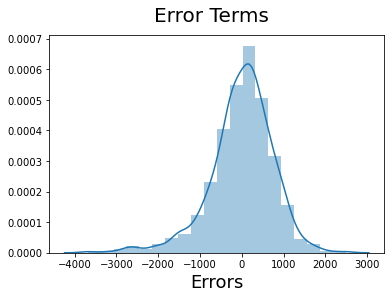

In [83]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_Cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

We can see thar residual errors are normally distributed arround mean 0.

# Making Predictions Using the Final Model
    Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final, i.e. fifth model.

In [84]:
X_test.describe()

,temp,atemp,hum,windspeed,season_Spring,season_Summer,season_Winter,yr_1,mnth_Aug,mnth_Dec,...,holiday_1,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,workingday_1,weathersit_Light Snow,weathersit_Mist
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,...,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,0.569603,0.542752,0.635933,0.315127,0.226027,0.273973,0.219178,0.445205,0.061644,0.075342,...,0.034247,0.095890,0.232877,0.191781,0.130137,0.082192,0.164384,0.547945,0.034247,0.315068
std,0.238088,0.222120,0.156357,0.161524,0.419697,0.447530,0.415114,0.498699,0.241335,0.264852,...,0.182488,0.295454,0.424119,0.395057,0.337612,0.275602,0.371899,0.499409,0.182488,0.466142
min,0.046591,0.025950,0.261915,-0.042808,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.359075,0.346732,0.534457,0.196160,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.560248,0.544652,0.614856,0.306383,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,0.801929,0.743337,0.730570,0.411976,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,0.984424,0.980934,1.002146,0.800793,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [85]:
variables=X_train_new5.columns
variables

Index(['const', 'temp', 'hum', 'windspeed', 'season_Summer', 'season_Winter',
       'yr_1', 'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Jul', 'mnth_Nov',
       'mnth_Sep', 'holiday_1', 'weekday_Sun', 'weathersit_Light Snow',
       'weathersit_Mist'],
      dtype='object')

In [86]:
X_test_5=sm.add_constant(X_test)

In [87]:
#only consider columns that are present in final model
X_test_5=X_test_5[variables]
X_test_5

,const,temp,hum,windspeed,season_Summer,season_Winter,yr_1,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Nov,mnth_Sep,holiday_1,weekday_Sun,weathersit_Light Snow,weathersit_Mist
184,1.0,0.831783,0.657364,0.084219,0,0,0,0,0,0,1,0,0,1,0,0,1
535,1.0,0.901354,0.610133,0.153728,1,0,1,0,0,0,0,0,0,0,0,0,0
299,1.0,0.511964,0.837699,0.334206,0,1,0,0,0,0,0,0,0,0,0,0,1
221,1.0,0.881625,0.437098,0.339570,0,0,0,0,0,0,0,0,0,0,0,0,0
152,1.0,0.817246,0.314298,0.537414,1,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219,1.0,0.879548,0.610133,0.322193,0,0,0,0,0,0,0,0,0,0,0,0,0
719,1.0,0.333364,0.573637,0.713904,0,0,1,1,0,0,0,0,0,0,0,0,1
3,1.0,0.175530,0.608434,0.253659,0,0,0,0,0,1,0,0,0,0,0,0,0
392,1.0,0.319864,0.559896,0.362295,0,0,1,0,0,1,0,0,0,0,0,0,0


In [88]:
y_test

184    6043
535    6211
299    2659
221    4780
152    4968
       ... 
219    4326
719    3623
3      1562
392    4023
360    1162
Name: cnt, Length: 146, dtype: int64

In [89]:
y_test_pred=lr5.predict(X_test_5)
y_test_pred

184    3465.791766
535    7939.554720
299    3748.284098
221    5252.910225
152    5353.109879
          ...     
219    5034.088377
719    2940.925806
3      1291.457488
392    3815.034317
360    1326.964163
Length: 146, dtype: float64

# Model Evaluation
Let's now plot the graph for actual versus predicted values

Text(0, 0.5, 'y_pred')

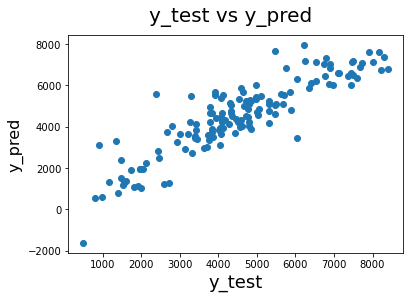

In [90]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)      

In [91]:
print(lr5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     198.8
Date:                Sat, 30 Jan 2021   Prob (F-statistic):          3.10e-220
Time:                        09:39:45   Log-Likelihood:                -4703.4
No. Observations:                 584   AIC:                             9441.
Df Residuals:                     567   BIC:                             9515.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  2363.47

In [92]:
# Check for r-square of test set of values
from sklearn.metrics import r2_score
r2_score(y_test, y_test_pred)

0.7840440555747289

## We can see that the equation of our best fitted line is:

$ cnt= 4595.512 \times temp -1375.334 \times hum -1651.889 \times windspped + 553.983 \times season\_Summer + 1207.814 \times season\_Winter +1972.989 \times yr\_1 -487.729 \times mnth\_Dec -433.559 \times mnth\_Feb -622.855 \times mnth\_Jan -393.658 \times mnth\_Jul -442.950 \times mnth\_Nov +658.910 \times mnth\_Sep -811.727 \times holiday\_1 +193.745 \times weekday\_Sun -2163.668 \times weathersit\_Light Snow -417.555 \times weathersit\_Mist $

### Overall we have a decent model, but I also acknowledge that we could do better.